# 1. Continuous Uniform Density

- **Simplest** density function
- Corresponds to a random variable $U$ whose value can be some real number in the interval $[a,b]$

- The density function is given by:

# $f(x) = \left\{\begin{matrix}\frac{1}{b-a} & \text{if }a\leq x \leq b\\ 0 & otherwise\end{matrix}\right.$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

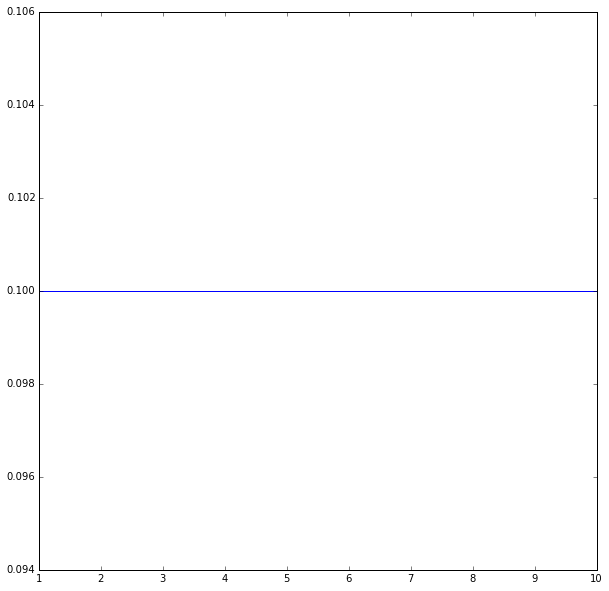

In [2]:
x = np.arange(1,11)
y = 0.1*np.ones(len(x))
plt.plot(x,y)

# 2. Exponential and Gamma Densities

- The **exponential density** function is defined by:

# $f(x) = \left\{\begin{matrix}\lambda e^{-\lambda x} & \text{if }0\leq x \leq \infty \\ 0 & otherwise\end{matrix}\right.$


- We can see right away that if we integrate to get the cumulative distribution function $F(X)$:

# $F(x) = \left\{\begin{matrix}-e^{-\lambda x} & \text{if }0\leq x \leq \infty \\ 0 & otherwise\end{matrix}\right.$

- Which means that if we're integrating from 0 to some a:

# $P(0\leq X \leq a) = 1 - e^{-\lambda a}$

- $\lambda$ can be any positive constant
    - Otherwise, the $e^{-\lambda a}$ value in $P(0\leq X \leq a)$ would be greater than one leading to a negative probability
        - *This doesn't make sense*

![](images/summary1.PNG)

- We use the exponential density to answer the question: **how long until the special event happens?**

### Recall: the geometric distribution is *memoryless*

- **The same is true of the exponential density**
    - i.e. $P(X>r+s|X>r) = P(X>s)$
    
- We can show this pretty easily:

### $P(X>r+s|X>r) = \frac{P(X>r+s \cap X>r) }{P(x>r)} = \frac{P(X>r+s)}{P(X>r)} = \frac{1 - P(X\leq r+s)}{1 - P(X\leq r)} = \frac{1 - (1- e^{-\lambda (r+s)})}{1 - (1- e^{-\lambda r})} = \frac{e^{-\lambda (r+s)}}{e^{-\lambda r}} = e^{-\lambda s} = P(X>s)$

### Exponential vs. Poisson

- Let $X_{1}$, $X_{2}$, ..., $X_{n}$ be a set of independent exponentially distributed random variables with parameter $\lambda$
    - One way this could be applied is to let $X_{i}$ represent the amount of time between the $i^{th}$ and $(i+1)^{th}$ particle being emitted
    
- Now, we consider some time interval $t$, and let $Y$ be a random variable representing the number of emmissions that occur during the time interval

- Let $S_{i} = X_{1} + X_{2} + ... + X_{i}$
    - This means $S_{i}$ is equal to the amount of time required for particles 1 through $i$ to be emmitted
    
- Therefore, if we want to know the probability that there are $n$ emmissions that occur in time $t$:

# $P(Y=n) = P(S_{n} \leq t \cap S_{n+1} > t)$

- This means that the amount of time for $n$ particles to be emmitted must be less than $t$, but also that is requres more than $t$ to emit more than $n$ particles
    - Otherwise, there would be $n+1$ emmissions in time $t$, and that's not what we're looking for
    
- This means that 

# $P(S_{n} \leq t \cap S_{n+1} > t) = P(S_{n} \leq t) - P(S_{n+1} \leq t)$

### In chapter 7, the density of $S_{n}$ is derived as:

# $g_{n}(x) = \left\{\begin{matrix}\lambda\frac{(\lambda x)^{n-1}}{(n-1)!} e^{-\lambda x}&\text{if }0\leq x \leq \infty \\ 0 &otherwise\end{matrix}\right.$

- The function above describes the **gamma function** with parameters $n$ and $\lambda$

- By induction, the cumulative distribution function for $g_{n}(x)$ aka $S_{n}$ is derived as:

# $G_{n}(x) = \left\{\begin{matrix}1- e^{-\lambda x}(1+\frac{\lambda x}{1!}+...+\frac{(\lambda x)^{n-1}}{(n-1)!})&\text{if }0\leq x \leq \infty \\ 0 &otherwise\end{matrix}\right.$

### Using $G_{n}$ to solve for $P(S_{n} \leq t \cap S_{n+1} > t)$:

### $P(S_{n} \leq t \cap S_{n+1} > t) = G_{n}(t) - G_{n+1}(t) = e^{-\lambda t}(1+\frac{\lambda t}{1!}+...+\frac{(\lambda t)^{n}}{n!}) - e^{-\lambda t}(1+\frac{\lambda t}{1!}+...+\frac{(\lambda t)^{n-1}}{(n-1)!}) = e^{-\lambda t}(\frac{(\lambda t)^{n}}{n!})$

### But what is this expression? It's the poisson distribution (with parameters $n$ and $\lambda t$)!

## Example

- Suppose that customers arrive at random times at a service station that has only one server

- **How long should a customer expect to wait?**
    - **Recall:** we said the exponential density deals with questions of *how long until a special event?*
        - Here, the special event is being called to the service station
        
- The wait time is dependent on two factors:
    1. The arrival time
    2. The time it takes to service the customers ahead
        
- We assume that the arrival time of customer $i$ is given by the random variable $X_{i}$ with the density function $f(t) = \lambda e^{-\lambda t}$ therefore the cumulative distribution is given by $F(t) = 1 - e^{-\lambda t}$

- We also assume that the time is takes to service customer $i$ is given by the random variable $Y_{i}$ with the density function $f^{*}(t) = \lambda^{*} e^{-\lambda^{*} t}$ with $F(t) = 1 - e^{-\lambda^{*} t}$

- From here, we can simulate wait times based on these functions
    - **Not gonna do it here**

___
# Aside: Functions of a random variable

- We need to think about random variables that are a function of other random variables

### Theorem

- Let $X$ be a continuous random variable
- Suppose that $\phi(x)$ is a strictly (i.e monotonically) increasing function over the possible values of $X$

- We define $Y = \phi(X)$

- Let $F_{X}$ and $F_{Y}$ denote the cumulative distribution functions of $X$ and $Y$ respectively

**Then, these two functions are related by:**

## $F_{Y}(y) = F_{X}(\phi^{-1}(y))$

#### Proof

$F_{Y}(y) = P(Y\leq y) = P(\phi(X) \leq y) = P(X \leq \phi^{-1}(y)) = F_{X}(\phi^{-1}(y))$

### Corollary

- Let $X$ be a continuous random variable
- Suppose that $\phi(x)$ is a monotonically increasing function over the possible values of $X$

- Define $Y=\phi(X)$

- Let $f_{Y}$ and $f_{X}$ denote the density functions of $X$ and $Y$ respectively

**Then, these two functions are related by:**

## $f_{Y}(y) = f_{X}(\phi^{-1}(y))\cdot\frac{d}{dy}\phi^{-1}(y)$

____

# 3. Normal Density

- **The most important density function**

- The normal density has parameters $\mu$ (the average value) and $\sigma$ (the standard deviation)

- The normal density is defined as:

# $f_{X}(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$

- This function is hard to integrate, hence the cdf of the normal density is:

# $F_{X}(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{2\pi\sigma}}e^{\frac{-(u-\mu)^{2}}{2\sigma^{2}}}du$

- Instead of trying to solve this, we usually just use lookup tables

### The *standard normal* density is a normal density with $\mu = 0$ and $\sigma = 1$

- We can use the standard normal density to calculate the cumulative probability of a normally distributed random variable $X$

# $ F_{X}(x) = P(X<x) = P(Z<\frac{x-\mu}{\sigma})$

- i.e. we just calculate how many standard deviations away from $\mu$ that $x$ is, then use the Z-table (standard normal density lookup table)

### The process of converting $X\rightarrow Z$ is called *standardization* and we describe the relationship as $Z = \frac{X-\mu}{\sigma}$

### Example

- Suppose that $X$ is a normally distributed random variable with parameters $\mu = 10$ and $\sigma = 3$
- What is the probability that $X$ is between $4$ and $16$?

### $P(4<X<16) = P(X<16) - P(X<4)$

### $\frac{16-10}{3} = 2 \implies 16$ is 2 standard deviations above $\mu$

### $\frac{4-10}{3} = -2 \implies 16$ is 2 standard deviations below from $\mu$

### So $P(X<16) = P(Z<2) = 0.9772$ and $P(X<4) = P(Z<-2) = 0.0228$

### Therefore $P(4<X<16) = 0.9772 - 0.0228 = 0.9544$

____

# 4. Maxwell and Rayleigh Densities

### Motivating example

- Suppose you drop a dart on a large table top (evaluated as an $xy$ plane)

- We assume that the $x$ and $y$ values follow the standard normal distribution (i.e. $\mu = 0$ and $\sigma = 1$)

- **How is the distance from the point of origin (0,0) distributed?**

### Example from Physics

- This problem arrives in physics when a particle is moving through an $R^{n}$ dimensional space
    - The particle's direction vector can be broken down into its components, and **each component is independently distributed**
        - **What does this mean?**: if a particle is moving through 3-dimensional space on a diagonal, the speed at which it is moving up is not affected by the speed at which it is moving forward or to the side


- **We want to derive the density for the speed of the particle**
    - In 3-dimensional space (i.e. $R^{3}$), this density is called the **Maxwell Density**
    - In 2-dimensional space (like the dartboard example), this density is called the **Rayleigh Density**

- We can simulate $x$ and $y$ to derive the distribution of $r = \sqrt{x^{2}+y^{2}}$

- We will see in chapter 7 that the density is given by:

# $f(r) = re^{\frac{-r^{2}}{2}}$

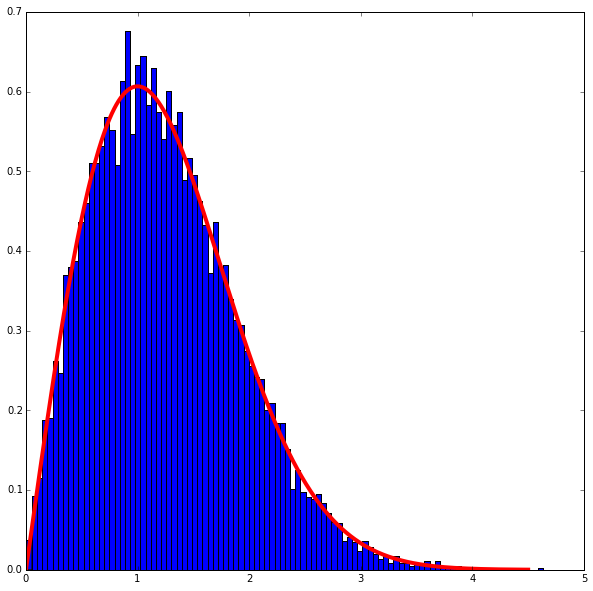

In [9]:
n = 10000

x = np.random.normal(size=n)
y = np.random.normal(size=n)

r = np.sqrt(x**2 + y**2)

x = np.arange(0,4.51,0.01)
fr = x*np.exp(-x**2/2)

plt.hist(r, bins = 100, normed = True)
plt.plot(x,fr, color = 'r', lw = 4)
plt.show()

___

# 5. Chi-squared Density

### Recall from [the 5.1 discussion of the Hypergeometric Distribution](../5.1-important-distributions/summary-of-chapter.ipynb#6.-Hypergeometric-distribution) we looked at the dependence of traits

### Using the Chi-squared density, we can solve similar problems with way less calculation

### Motivating Example

- Suppose that we have the following data

![](images/table5-8.PNG)

- We set up this problem the same way as we did before: imagine we have a basket with 319 balls
    - 152 of the balls are blue (to represent the male students)
    - The remaining 167 balls are red (to represent the female students)
    
- Step 1: Select 93 balls from the basket
    - These represent the 93 students that got an A
    
- Step 2: Select 123 balls from the basket
    - These represent the 123 students that got a B
    
- Step 3: Select 90 balls from the basket
    - These represent the 90 students that got a C
    
- Step 4: Look at the 13 balls remaining in the basket
    - These represent the 13 students that got below a C

- If we continue following the procedure as before, we'd derive the table of expected results shown below:

![](images/table5-9.PNG)

- **To continue from here and check to see how improbable Table 5.8 is vs. Table 5.9, we'd need to do A TON OF CALCULATIONS**

### Instead, we can define a single number that can measure how probable/improbable it is

### We calculate the residual for each observed value (i.e. the difference between the observed value and the expected value) 

# $\chi^{2} = \sum^{n}_{i=0}\frac{(O_{i}-E_{i})^{2}}{E_{i}}$


### So, for the tables above, $\chi^{2} = \frac{(37-44.3)^2}{44.3}+\frac{(56-48.73)^2}{48.7}+\frac{(63-58.6)^2}{58.6}+\frac{(60-64.4)^2}{64.4}+\frac{(47-42.9)^2}{42.9}+\frac{(43-47.1)^2}{47.1}+\frac{(5-6.2)^2}{6.2}+\frac{(8-6.8)^2}{6.8}$

In [11]:
df_O = pd.DataFrame({'Female':[37,63,47,5]})
df_O['Male'] = [56,60,43,8]

df_E = pd.DataFrame({'Female':[44.3,58.6,42.9,6.2]})
df_E['Male'] = [48.7,64.4,47.1,6.8]

In [14]:
df_O

,Female,Male
0,37,56
1,63,60
2,47,43
3,5,8


In [15]:
df_E

,Female,Male
0,44.3,48.7
1,58.6,64.4
2,42.9,47.1
3,6.2,6.8


In [21]:
chi_2 = ((df_O - df_E)**2/df_E).sum().sum()

In [22]:
chi_2

4.120946069780853

### So we got a $\chi^{2}$ value of 4.12, but what does it mean?

- Like the normal density, we use lookup tables to evaluate our chi-squared values

- The chi-squared density is **defined by one parameter: $n$ (degrees of freedom)**
    - The degrees of freedom is calculated as $n = (a-1)(b-1)$ where $a$ and $b$ are the number of possible values for the traits we're comparing
        - So for the example above, there are 4 categories (A, B, C, and below C)
            - If we look at the female row, and we know the number of As, Bs, and Cs, then we automatically know below Cs (since it's just 152-#As-#Bs-#Cs)
                - But we'd also know the number of Males that got As, Bs, Cs, and below Cs since they're implied by the female numbers
                    - **SO REALLY, THERE ARE ONLY 3 VALUES THAT CAN VARY, AND THE REST ARE ALL IMPLIED**
                    
- So for the example above: $n=3$

### If we look up the value 4.12 in the chi-square table with $n=3$, we see that this value is pretty unlikely, but not so unlikely that we reject the possibility that they're independent

___

# 6. Cauchy Density

### Motivating Example

- Suppose that a mirror is mounted on a vertical axis, but can rotate around the axis

- The axis is one foot from a straight wall of infinite length

- A pulse of light is shown onto the mirror, and the reflected ray hits the wall

- Let $\phi$ be the angle between the reflected ray and the line that is perpendicular to the wall
    - We assume that $\phi$ is uniformly distributed between $[-\frac{\pi}{2},\frac{\pi}{2}]$
    
- Let $X$ represent the distance between the point on the wall that is hit by the reflected ray and the point on the wall that is closest to the axis of the mirror

![](images/cauchy1.png)

- Let $B$ be some fixed constant value

### What is $P(X\geq B)$?

- We know that $tan(\phi) = \frac{X}{1} = X \implies X\geq B$ when $tan(\phi)\geq B \implies X\geq B$ when $\phi \geq arctan(B)$

- Since $\phi$ is uniformly distributed over $[-\frac{\pi}{2},\frac{\pi}{2}]$, its cdf is given by:

# $P(\phi < x) = \frac{x + \frac{\pi}{2}}{\pi} \implies P(\phi < arctan(B)) = \frac{arctan(B) + \frac{\pi}{2}}{\pi}$